In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:

# --- Configuration ---
# Set the base filepath where the CBIS-DDSM CSV files are located.
# IMPORTANT: Make sure the path you provided is correct.
filepath = r"C:\Users\New User\Documents\GitHub\breast-cancer-detection-project\data\raw\CBIS-DDSM\csv"

# Set the style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-talk')

# --- File Paths ---
mass_train_path = os.path.join(filepath, "mass_case_description_train_set.csv")
calc_train_path = os.path.join(filepath, "calc_case_description_train_set.csv")

# --- Load the Datasets ---
try:
    mass_train_df = pd.read_csv(mass_train_path)
    calc_train_df = pd.read_csv(calc_train_path)
    print("Successfully loaded the datasets.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\nPlease ensure the filepath is correct and the CSV files exist in that directory.")
    # Exit the script if files are not found
    exit()



Successfully loaded the datasets.



--- Analyzing Mass Training Set ---


C:\Users\New User\AppData\Local\Temp\ipykernel_29856\2459551606.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  shape_ax = sns.countplot(y=mass_train_df['mass shape'], order=mass_train_df['mass shape'].value_counts().index, palette='viridis')
C:\Users\New User\AppData\Local\Temp\ipykernel_29856\2459551606.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  margin_ax = sns.countplot(y=mass_train_df['mass margins'], order=mass_train_df['mass margins'].value_counts().index, palette='plasma')
C:\Users\New User\AppData\Local\Temp\ipykernel_29856\2459551606.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

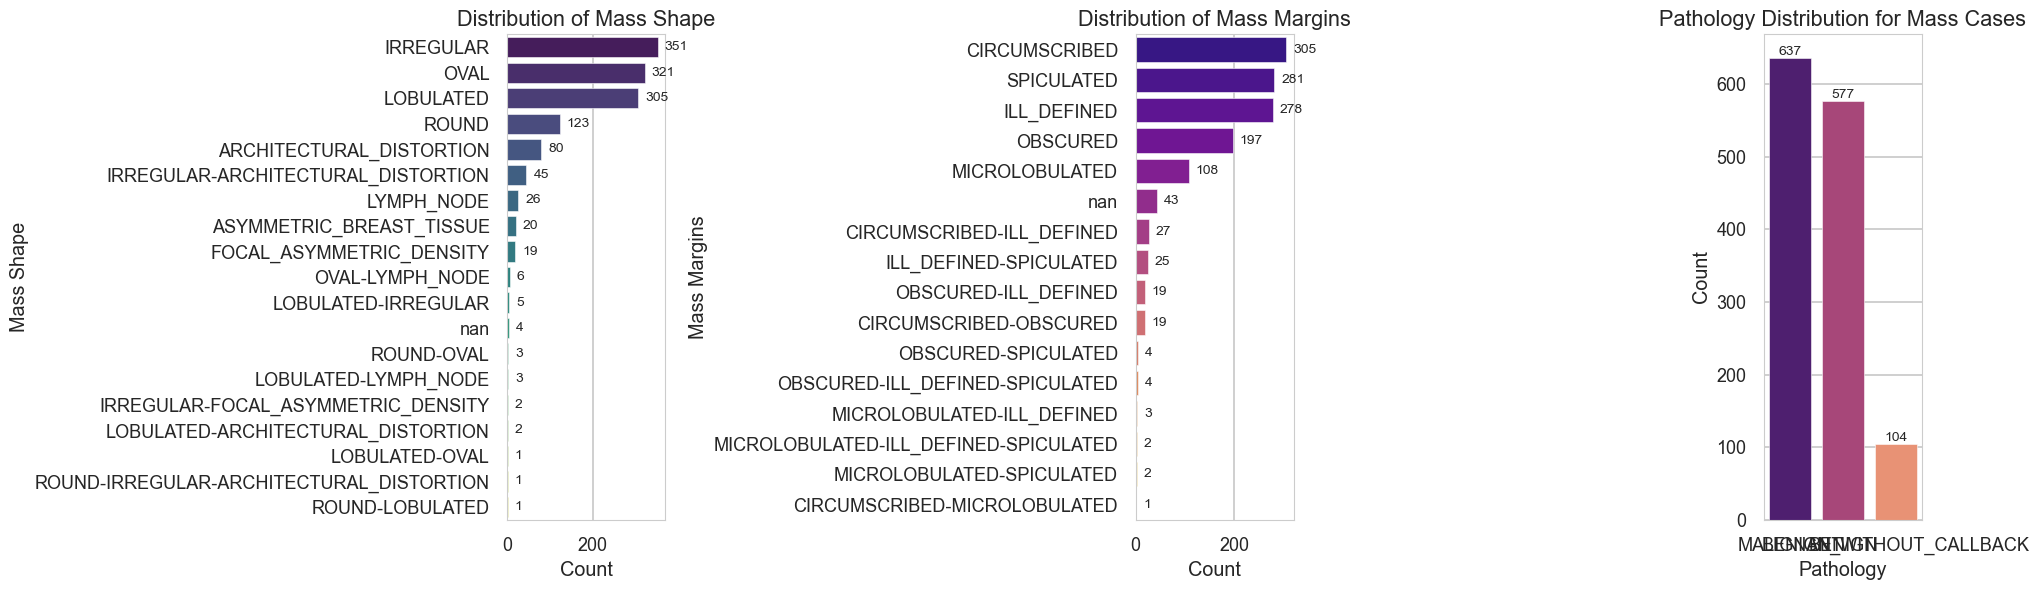

In [4]:

# ==============================================================================
# 1. Mass Abnormalities Analysis (Training Set)
# ==============================================================================
print("\n--- Analyzing Mass Training Set ---")

# Clean up column names by stripping whitespace
mass_train_df.columns = mass_train_df.columns.str.strip()

# Clean up data in the columns by stripping whitespace
# We will focus on the relevant columns for this analysis
mass_cols = ['mass shape', 'mass margins', 'pathology']
for col in mass_cols:
    if col in mass_train_df.columns:
        # Ensure the column is of string type before applying .str accessor
        mass_train_df[col] = mass_train_df[col].astype(str).str.strip()


plt.figure(figsize=(20, 6))

# a) Plotting the distribution of Mass Shape
plt.subplot(1, 3, 1)
shape_ax = sns.countplot(y=mass_train_df['mass shape'], order=mass_train_df['mass shape'].value_counts().index, palette='viridis')
plt.title('Distribution of Mass Shape')
plt.xlabel('Count')
plt.ylabel('Mass Shape')
for container in shape_ax.containers:
    shape_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)


# b) Plotting the distribution of Mass Margins
plt.subplot(1, 3, 2)
margin_ax = sns.countplot(y=mass_train_df['mass margins'], order=mass_train_df['mass margins'].value_counts().index, palette='plasma')
plt.title('Distribution of Mass Margins')
plt.xlabel('Count')
plt.ylabel('Mass Margins')
for container in margin_ax.containers:
    margin_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)


# c) Plotting the pathology distribution for Mass cases
plt.subplot(1, 3, 3)
mass_path_ax = sns.countplot(x=mass_train_df['pathology'], order=mass_train_df['pathology'].value_counts().index, palette='magma')
plt.title('Pathology Distribution for Mass Cases')
plt.xlabel('Pathology')
plt.ylabel('Count')
for container in mass_path_ax.containers:
    mass_path_ax.bar_label(container, fmt='%d', label_type='edge')


plt.tight_layout()
plt.show()




Mass Abnormality Analysis
The plots for the mass training set (E_1.png) provide a granular view of the characteristics of mass-type abnormalities.

Pathology Distribution: For masses specifically, there is a relatively balanced distribution between MALIGNANT (637 cases) and BENIGN (577 cases), with an additional 104 BENIGN_WITHOUT_CALLBACK cases. This near-parity in the primary classes is excellent for training a model to distinguish between benign and malignant masses.

Mass Shape Distribution: The distribution of mass shapes is heavily skewed. IRREGULAR (351), OVAL (321), and LOBULATED (305) are the dominant shapes. Other categories like ROUND (123) are less common, and there is a long tail of very rare, complex, or combined shape descriptions (e.g., ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION with only 1 case). This "long-tail" problem means the model will have very few examples to learn from for these rare shapes.

Mass Margins Distribution: A similar pattern exists for mass margins. CIRCUMSCRIBED (365), SPICULATED (281), and ILL-DEFINED (278) are the most frequent. Again, we see a long tail of multi-descriptor margins and rare categories. The presence of nan (43 cases) indicates missing data that needs to be handled, likely through imputation or by treating it as a separate category.


--- Analyzing Calcification Training Set ---


C:\Users\New User\AppData\Local\Temp\ipykernel_29856\718097238.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  calc_type_ax = sns.countplot(
C:\Users\New User\AppData\Local\Temp\ipykernel_29856\718097238.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  calc_dist_ax = sns.countplot(
C:\Users\New User\AppData\Local\Temp\ipykernel_29856\718097238.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  calc_path_ax = sns.countplot(x=calc_train_df['pathology'], order=calc_train_df['pathology'].value_counts().index, palette='coolwarm')


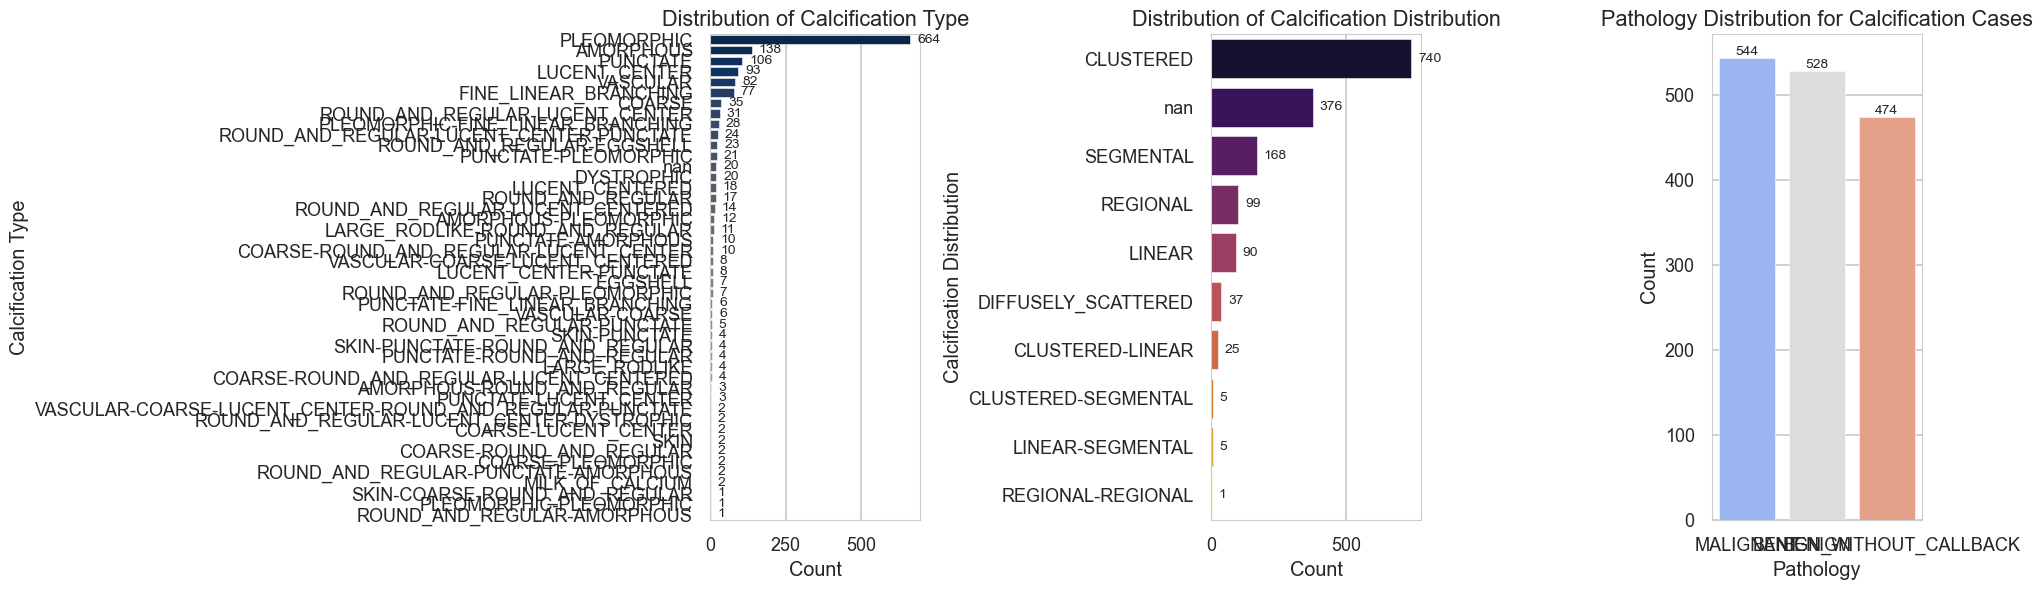

In [10]:
# ==============================================================================
# 2. Calcification Abnormalities Analysis (Training Set)
# ==============================================================================
print("\n--- Analyzing Calcification Training Set ---")

# Clean up column names and data
calc_train_df.columns = calc_train_df.columns.str.strip()
calc_cols = ['calc type', 'calc distribution', 'pathology']
for col in calc_cols:
     if col in calc_train_df.columns:
        calc_train_df[col] = calc_train_df[col].astype(str).str.strip()


plt.figure(figsize=(20, 6))

# a) Plotting the distribution of Calcification Type
plt.subplot(1, 3, 1)
calc_type_ax = sns.countplot(
    y=calc_train_df['calc type'],
    order=calc_train_df['calc type'].value_counts().index,
    palette='cividis'
)
plt.title('Distribution of Calcification Type')
plt.xlabel('Count')
plt.ylabel('Calcification Type')
for container in calc_type_ax.containers:
    calc_type_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# b) Plotting the distribution of Calcification Distribution
plt.subplot(1, 3, 2)
calc_dist_ax = sns.countplot(
    y=calc_train_df['calc distribution'],
    order=calc_train_df['calc distribution'].value_counts().index,
    palette='inferno'
)
plt.title('Distribution of Calcification Distribution')
plt.xlabel('Count')
plt.ylabel('Calcification Distribution')
for container in calc_dist_ax.containers:
    calc_dist_ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# c) Plotting the pathology distribution for Calcification cases
plt.subplot(1, 3, 3)
calc_path_ax = sns.countplot(x=calc_train_df['pathology'], order=calc_train_df['pathology'].value_counts().index, palette='coolwarm')
plt.title('Pathology Distribution for Calcification Cases')
plt.xlabel('Pathology')
plt.ylabel('Count')
for container in calc_path_ax.containers:
    calc_path_ax.bar_label(container, fmt='%d', label_type='edge')


plt.tight_layout()
plt.show()


Calcification Abnormality Analysis
The calcification plots (E_2.jpg) highlight even greater complexity and data imbalance.

Pathology Distribution: The balance for calcification cases is also quite good between the primary classes: MALIGNANT (544 cases) and BENIGN (528 cases), with 474 cases of BENIGN_WITHOUT_CALLBACK.

Calcification Type Distribution: This is the most imbalanced feature observed. PLEOMORPHIC (664 cases) is overwhelmingly the most common type. The next most frequent, LUCENT_CENTER, has only 88 cases. The plot shows an extremely long tail of other calcification types, many with single-digit counts. This severe imbalance means a model might struggle to accurately classify any type other than Pleomorphic. The visual clutter in the graph itself is indicative of the data's complexity.

Calcification Distribution Distribution: While more balanced than calcification type, there is still a clear primary class: CLUSTERED (749 cases). SEGMENTAL (188) and REGIONAL (99) are the next most common. The presence of nan (179 cases) is also a significant data quality issue to address here.


--- Analyzing Overall Dataset Balance ---


C:\Users\New User\AppData\Local\Temp\ipykernel_29856\4070475734.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  overall_ax = sns.countplot(x=overall_pathology, order=overall_pathology.value_counts().index, palette='spring')


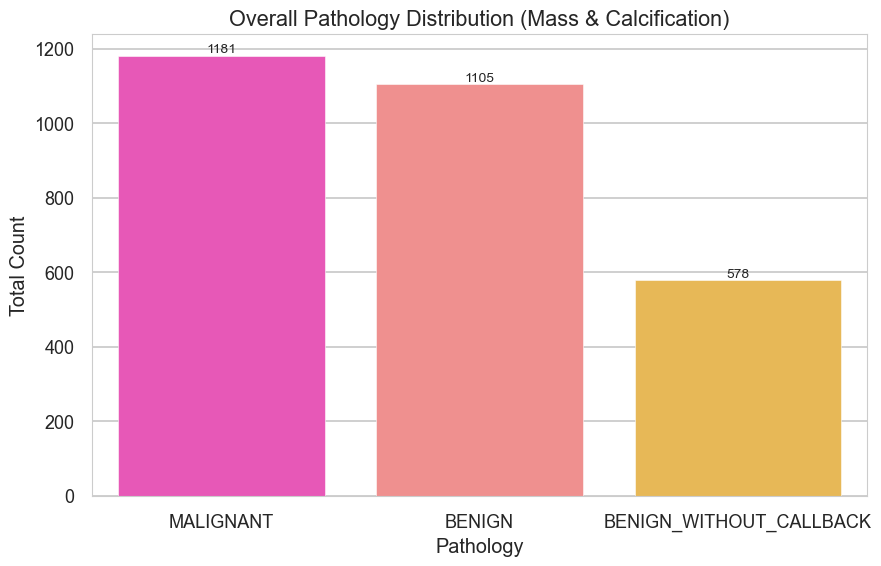


Analysis complete. The plots above show the distribution of different features in the CBIS-DDSM training set.


In [6]:

# ==============================================================================
# 3. Overall Dataset Balance (Mass + Calcification)
# ==============================================================================
print("\n--- Analyzing Overall Dataset Balance ---")

# Combine the pathology columns from both dataframes
overall_pathology = pd.concat([mass_train_df['pathology'], calc_train_df['pathology']], ignore_index=True)

# Plotting the overall pathology distribution
plt.figure(figsize=(10, 6))
overall_ax = sns.countplot(x=overall_pathology, order=overall_pathology.value_counts().index, palette='spring')
plt.title('Overall Pathology Distribution (Mass & Calcification)')
plt.xlabel('Pathology')
plt.ylabel('Total Count')
for container in overall_ax.containers:
    overall_ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

print("\nAnalysis complete. The plots above show the distribution of different features in the CBIS-DDSM training set.")




The overall pathology distribution graph (E_3.png) shows a significant class imbalance. The dataset is composed of:

1181 Malignant cases

1105 Benign cases

578 Benign_Without_Callback cases

This reveals a nearly even split between MALIGNANT and BENIGN cases, but the presence of the BENIGN_WITHOUT_CALLBACK category, which is essentially another form of benign, skews the overall balance. When combined, there are 1683 benign-type cases (1105 + 578) versus 1181 malignant cases. This is a moderate but significant imbalance that must be addressed during model training, potentially using techniques like class weighting, oversampling (e.g., SMOTE), or undersampling to prevent the model from developing a bias towards predicting the more frequent benign classes.

Key Insights and Implications for Machine Learning
Address Overall Class Imbalance: The ~1.4:1 ratio of benign-type to malignant cases needs to be handled to ensure the final model is not biased.

Beware of Long-Tail Distributions: For features like mass shape, mass margins, and especially calcification type, the model will not have enough data to learn the rare categories effectively. This could lead to poor performance on those specific cases. Strategies to consider include:

Grouping Rare Categories: Combine rare, clinically similar categories into a single "Other" or "Complex" category.

Feature Engineering: Create new, simpler features from the complex ones. For example, a binary feature for "IsCircumscribed" vs. "IsNotCircumscribed".

Handle Missing Data (nan): The nan values in mass margins and calcification distribution must be addressed. They can be filled with the most frequent value (mode), or treated as a distinct category if the "missingness" itself is predictive.

Data Cleaning is Essential: The presence of many multi-descriptor categories (e.g., ILL_DEFINED-SPICULATED) suggests that the data could benefit from cleaning and standardization to simplify the feature space.

Separate Models as an Option: Given the distinct characteristics and different levels of data complexity between mass and calcification abnormalities, it might be beneficial to train two separate models—one for mass classification and one for calcification classification—before combining their predictions.

In summary, while the CBIS-DDSM dataset is a powerful resource, your analysis correctly reveals that it is not a simple "plug-and-play" dataset. Careful preprocessing, thoughtful feature engineering, and strategies to handle class imbalance are essential next steps to build a successful and reliable diagnostic model.